# Handling Imbalanced DataSet
# 1.Up Sampling
# 2. Down Sampling

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Set the random seed for reproductivity
np.random.seed(123)

#Create a dataframe with two classes
n_samples=1000
class_0_ratio=0.9
n_class_0=int(n_samples*class_0_ratio)
n_class_1=n_samples-n_class_0

In [5]:
n_class_0 , n_class_1

(900, 100)

In [7]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET

class_0=pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0

})

class_1=pd.DataFrame({
    'feature_1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2':np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1]*n_class_1
    
})

In [11]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [12]:
df.head()

,feature_1,feature_2,target
0,-0.300232,0.667532,0
1,-0.632261,0.100458,0
2,-0.204317,-0.012610,0
3,0.213696,0.219907,0
4,1.033878,0.813623,0


In [13]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

#  upsampling

In [15]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [33]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True, #Sample With replacement
         n_samples=len(df_majority),
         random_state=42
        )

In [34]:
df_minority_upsampled

,feature_1,feature_2,target
951,1.168666,2.305451,1
992,1.885705,2.954339,1
914,4.417832,3.790856,1
971,3.666319,1.731246,1
960,0.990663,1.305364,1
...,...,...,...
952,1.783976,0.627095,1
965,2.165885,0.905984,1
976,1.921324,0.480405,1
942,1.518157,1.312561,1


In [35]:
df_minority_upsampled.head() 

,feature_1,feature_2,target
951,1.168666,2.305451,1
992,1.885705,2.954339,1
914,4.417832,3.790856,1
971,3.666319,1.731246,1
960,0.990663,1.305364,1


In [36]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])

In [37]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

# downsampling

In [38]:
# Set the random seed for reproductivity
np.random.seed(123)

#Create a dataframe with two classes
n_samples=1000
class_0_ratio=0.9
n_class_0=int(n_samples*class_0_ratio)
n_class_1=n_samples-n_class_0

In [39]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET

class_0=pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0

})

class_1=pd.DataFrame({
    'feature_1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2':np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1]*n_class_1
    
})

In [40]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [41]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [43]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [45]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [46]:
from sklearn.utils import resample
df_majority_upsampled=resample(df_majority,replace=True, #Sample With replacement
         n_samples=len(df_minority),
         random_state=42
        )

In [47]:
df_majority_upsampled

,feature_1,feature_2,target
102,0.712265,0.718151,0
435,1.199988,0.574621,0
860,0.304515,-0.759475,0
270,-1.213385,0.675504,0
106,0.179549,-0.202659,0
...,...,...,...
201,-0.598105,1.575650,0
269,0.420180,0.570631,0
862,-0.392309,0.446491,0
815,-0.148405,-0.457929,0


In [48]:
df_downsampled=pd.concat([df_minority,df_majority_upsampled])

In [51]:
df_downsampled['target'].value_counts()

target
1    100
0    100
Name: count, dtype: int64

# SMOTE(Synthetic Minority Oversampling Tehnique)

In [52]:
from sklearn.datasets import make_classification

In [55]:
X,y=make_classification(n_samples=1000 ,n_redundant=0 , n_features=2,n_clusters_per_class=1,
                   weights=[0.90],random_state=12)

In [56]:
X

array([[-0.76289759, -0.70680807],
       [-1.07543571, -1.0511621 ],
       [-0.61011459, -0.90980157],
       ...,
       [-1.32643852, -1.815178  ],
       [-0.83348573, -0.5146474 ],
       [-0.30287558, -0.57597532]])

In [57]:
y

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [58]:
X.shape

(1000, 2)

In [59]:
len(y[y==0])

900

In [60]:
len(y[y==1])

100

In [70]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)

In [72]:
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [73]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

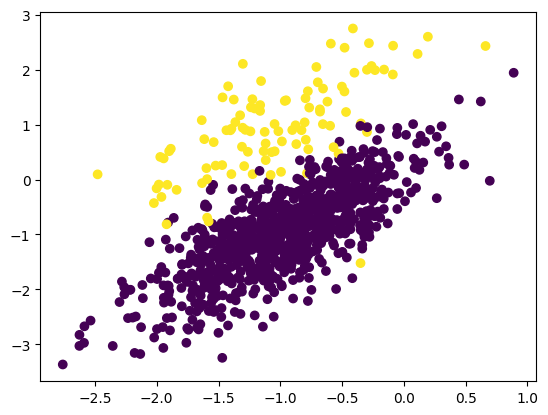

In [77]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [78]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 80.5 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [88]:
from imblearn.over_sampling import SMOTE

In [89]:
oversample=SMOTE()

In [90]:
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [91]:
X.shape

(1800, 2)

In [92]:
y.shape

(1800,)

In [93]:
len(y[y==0])

900

In [94]:
len(y[y==1])

900

In [95]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample=pd.concat([df1,df2],axis=1)
oversample

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
1795,-1.075036,0.514962,1
1796,-1.163673,1.268612,1
1797,-1.933183,-0.172332,1
1798,-1.920013,-0.094223,1


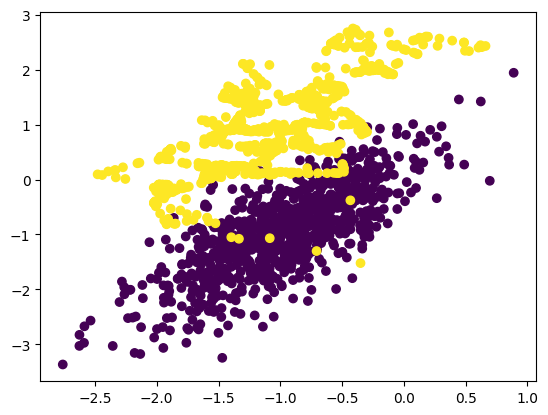

In [96]:
import matplotlib.pyplot as plt
plt.scatter(oversample['f1'],oversample['f2'],c=oversample['target'])